# PRACTICAL 2: USING REGULARIZATION TO SOLVE OVERFITTING

### Importing Libraries

In [16]:
import numpy as np
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# Without Column names
# data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+") # names=column_names
# With Column names
data = pd.read_csv('../housing.csv', header=None, delimiter=r"\s+", names=column_names)
pd.set_option('display.width', 1000)  # Increase the display width

print("Top 5 rows:")
print(data.head())
print()

print("Dataset Columns: \n", data.columns)
print()

print("Dataset Shape: ", data.shape)

Top 5 rows:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0     18.7  396.90   5.33  36.2

Dataset Columns: 
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype='object')

Dataset Shape:  (506, 14)


In [4]:
X=data.iloc[:,:12]
y=data.iloc[:,13]

X_train_temp1 = X.iloc[0:400,:]
X_train = np.zeros((X_train_temp1.shape[0],X_train_temp1.shape[1]+1))
X_train[:,0] = np.ones((X_train_temp1.shape[0]))
X_train[:,1:] = X_train_temp1
y_train = y.iloc[0:400]
print("Type of X_train:", type(X_train), "Shape of X_train:", X_train.shape)


X_test_temp1 = X.iloc[400:506,:]
X_test = np.zeros((X_test_temp1.shape[0],X_test_temp1.shape[1]+1))
X_test[:,0] = np.ones((X_test_temp1.shape[0]))
X_test[:,1:] = X_test_temp1
y_test = y.iloc[400:506]
print("Type of X_test:", type(X_test), "Shape of X_test:", X_test.shape)


scaler = StandardScaler()
scaler.fit(X_train[:,1:])
X_train[:,1:] = scaler.transform(X_train[:,1:])
X_test[:,1:] = scaler.transform(X_test[:,1:])

Type of X_train: <class 'numpy.ndarray'> Shape of X_train: (400, 13)
Type of X_test: <class 'numpy.ndarray'> Shape of X_test: (106, 13)


In [29]:
theta = np.random.uniform(0,1,size=(X_train.shape[1]))
niterations = 1000
alphas = [0.01, 0.05, 0.001, 0.003, 0.07]
alpha = 0.05
multi_costs = []
index = 0
m = X_train.shape[0]
n = X_train.shape[1]

error_train = []
error_test = []
lambda1 = 50
for i in range(niterations):
    update=np.zeros(X_train.shape[1])
    ypred=np.dot(X_train,theta)
    error=ypred - y_train
    for j in range(n):
        update[j]=np.sum(error*(X_train.T)[j])
    theta[0] = theta[0] - (1/m)*(alpha)*(update[0])
    theta[1:] = theta[1:]*(1 - (alpha * lambda1/m)) - (1/m)*(alpha)*update[1:] # (1/m)*(alpha)*(update[1:])
    # cost = (1 / (2 * m)) * np.sum(np.square(error))
    # costs.append(cost)
    prediction_train=np.dot(X_train, theta)
    prediction_test=np.dot(X_test, theta)
    error_test.append(metrics.mean_squared_error(y_true=y_test,y_pred=prediction_test))
    error_train.append(metrics.mean_squared_error(y_true=y_train,y_pred=prediction_train))
    

# For different Lambdas
lambdas = [5, 10, 50, 100, 500, 1000]
# errors 
for lambda1 in lambdas:    
    for i in range(niterations):
        update=np.zeros(X_train.shape[1])
        ypred=np.dot(X_train,theta)
        error=ypred - y_train
        for j in range(n):
            update[j]=np.sum(error*(X_train.T)[j])
        theta[0] = theta[0] - (1/m)*(alpha)*(update[0])
        theta[1:] = theta[1:]*(1 - (alpha * lambda1/m)) - (1/m)*(alpha)*update[1:] # (1/m)*(alpha)*(update[1:])
        # cost = (1 / (2 * m)) * np.sum(np.square(error))
        # costs.append(cost)
        prediction_train=np.dot(X_train, theta)
        prediction_test=np.dot(X_test, theta)
        error_test.append(metrics.mean_squared_error(y_true=y_test,y_pred=prediction_test))
        error_train.append(metrics.mean_squared_error(y_true=y_train,y_pred=prediction_train))

print("Theta:",theta)
# print("Cost:", cost)
print("Update:", update)
print("Theta Shape:", theta.shape)
predictions=np.dot(X_test, theta)
print(predictions)
print("MAE:", metrics.mean_absolute_error(y_true=y_test,y_pred=predictions))
print("MSE:", metrics.mean_squared_error(y_true=y_test,y_pred=predictions))

Theta: [ 2.43345000e+01 -1.33279603e+00  6.99813443e-01 -4.51417218e-01
  6.84637599e-01 -1.22320146e+00  4.85145231e+00 -9.79561538e-01
 -2.06039095e+00  1.61988602e+00 -7.71258040e-01 -1.69899156e+00
  1.12511230e-02]
Update: [-1.28608235e-11  6.66399104e+01 -3.49907895e+01  2.25704959e+01
 -3.42317999e+01  6.11602479e+01 -2.42572569e+02  4.89779870e+01
  1.03019501e+02 -8.09952703e+01  3.85638704e+01  8.49496664e+01
 -5.62484715e-01]
Theta Shape: (13,)
[16.0207744  20.80074167 22.17154469 11.87868058  9.78597212  4.60440756
  5.49175425 17.06527071 18.71043442 25.20028701  9.77308469 23.89697868
  9.37635766 10.68809479  1.53740109 20.34679417 24.59065867 11.68866294
  4.85850993 24.74684004 21.39243702 19.76151308 17.5694875  21.63330853
 18.45720205 17.35992723 19.92497309 15.13930239 21.80434114 21.97002952
 23.21584331 25.76520608 24.4284263  22.754809   19.23696189 22.45592699
 20.75392671 18.39168091 17.80368228 16.61112097 15.05687295 21.34458841
 20.97600025 21.80122763 17.1

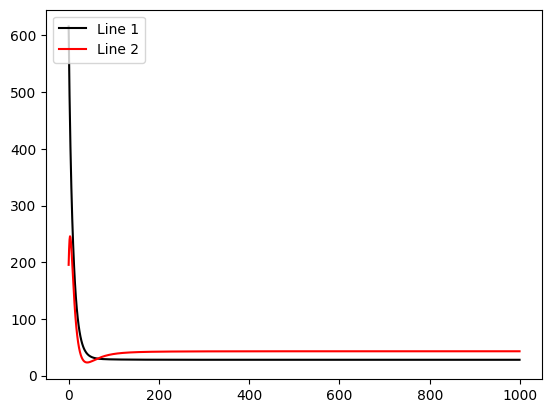

In [30]:
fig, ax = plt.subplots()
ax.plot(range(1000), error_train, color = 'black', label = 'Line 1')
ax.plot(range(1000), error_test, color = 'red', label = 'Line 2')
ax.legend(loc = 'upper left')
plt.show()
